In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.preprocessing import StandardScaler

from clustering.kmeans import KMeans
from clustering.kmedoids import KMedoids
from clustering.dbscan import DBSCAN
from clustering.agglomerative_clustering import AgglomerativeClustering
from util.plotting import PlotUtils

# 1. K-means

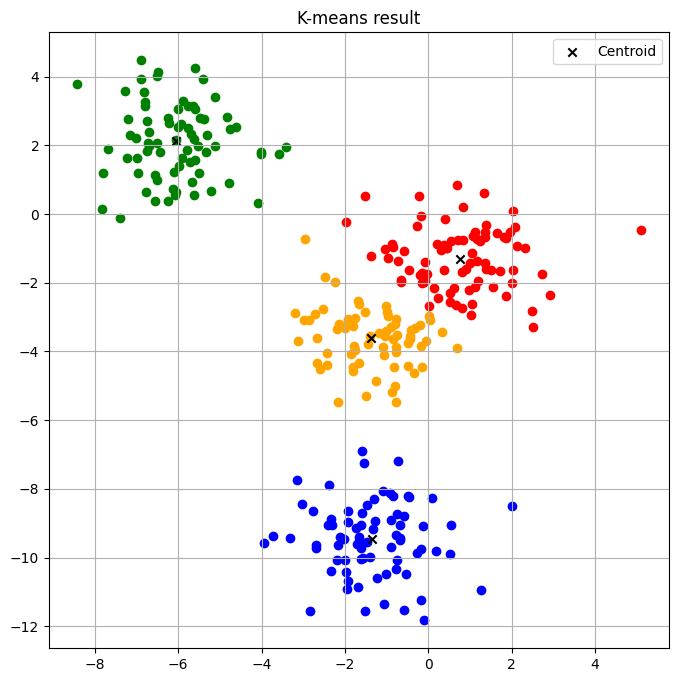

In [2]:
X, _ = make_blobs(n_samples=300, centers=4, random_state=2)
kmeans = KMeans(n_clusters=4, random_state=421)

kmeans.fit(X)
clusters = kmeans.labels

PlotUtils.plot("K-means result", X, clusters, kmeans.centroids)

# 2. K-medoids

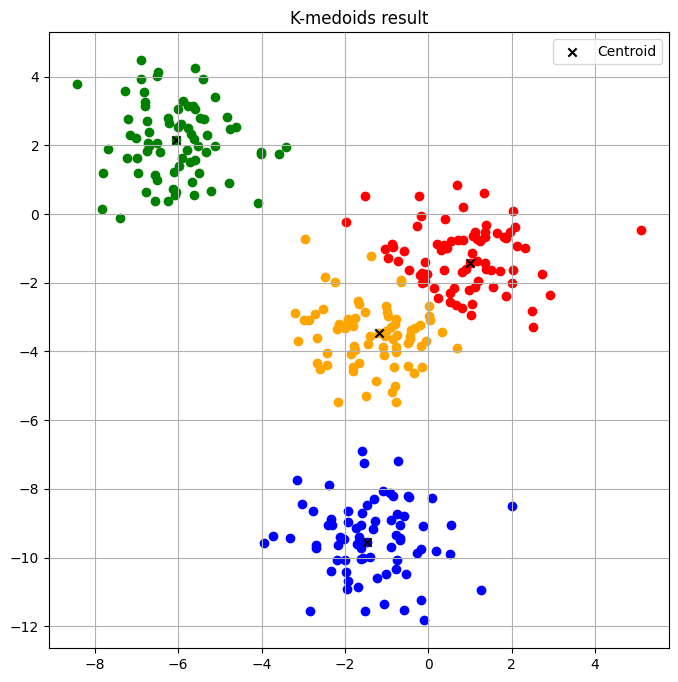

In [3]:
X, _ = make_blobs(n_samples=300, centers=4, random_state=2)
kmedoids = KMedoids(n_clusters=4, random_state=421)

kmedoids.fit(X)
clusters = kmedoids.labels

PlotUtils.plot("K-medoids result", X, clusters, kmedoids.medoids)

# 3. DBSCAN

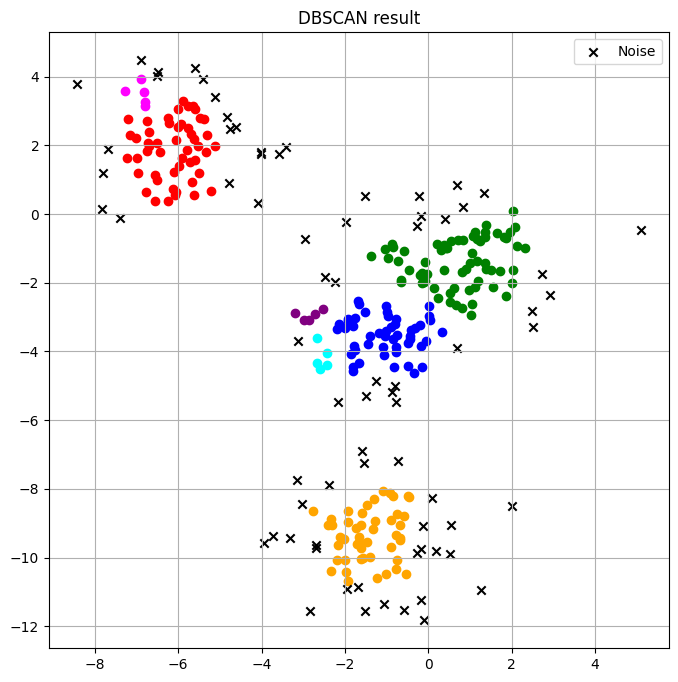

In [4]:
X, _ = make_blobs(n_samples=300, centers=4, random_state=2)
dbscan = DBSCAN()

dbscan.fit(X)
clusters = dbscan.labels

PlotUtils.plot_dbscan("DBSCAN result", X, clusters)

# 4. Agglomerative clustering

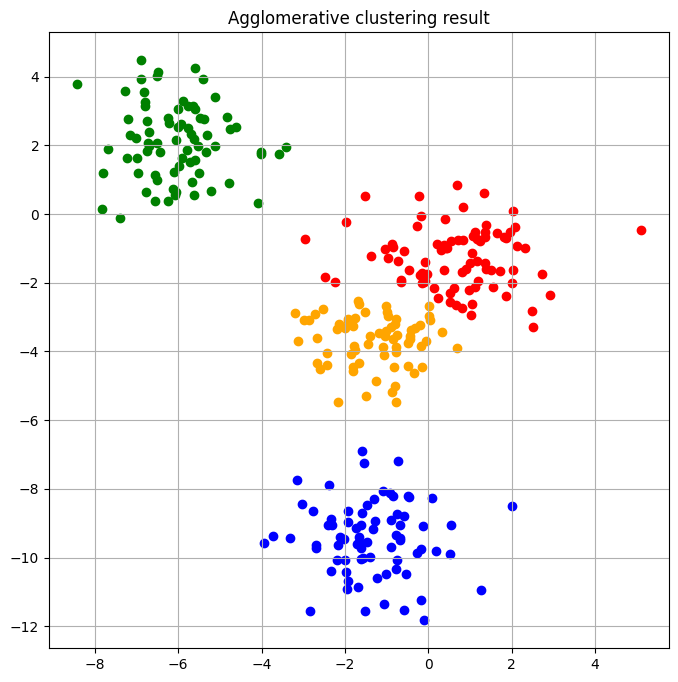

In [5]:
X, _ = make_blobs(n_samples=300, centers=4, random_state=2)
agg_clustering = AgglomerativeClustering(n_clusters=4)

agg_clustering.fit(X)
clusters = agg_clustering.labels

PlotUtils.plot("Agglomerative clustering result", X, clusters)

# Testing clustering on clusters of different forms

In [3]:
def generate_datasets():
    datasets = []

    X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05)
    datasets.append(StandardScaler().fit_transform(X))

    X, _ = make_moons(n_samples=300, noise=0.05)
    datasets.append(StandardScaler().fit_transform(X))

    X, _ = make_blobs(n_samples=300, centers=2, random_state=8)
    datasets.append(StandardScaler().fit_transform(X))

    X, _ = make_blobs(n_samples=300, centers=2, random_state=170)
    transformation = [[0.6, -0.6], [-0.4, 0.8]]
    X_aniso = np.dot(X, transformation)
    datasets.append(StandardScaler().fit_transform(X_aniso))

    X, _ = make_blobs(n_samples=300,
                      centers=2,
                      cluster_std=[1.0, 2.5],
                      random_state=170)
    datasets.append(StandardScaler().fit_transform(X))

    left_block = np.random.rand(300, 2) * [0.5, 1.0]  # X in [0, 0.5]
    right_block = np.random.rand(300, 2) * [0.5, 1.0] + [0.5, 0.0]  # X in [0.5, 1.0]
    X = np.vstack([left_block, right_block])
    datasets.append(StandardScaler().fit_transform(X))

    return datasets

In [46]:
def test_clustering():
    n_clusters = 2
    datasets = generate_datasets()
    tested_algorithms = [
        ('K-means', KMeans(n_clusters=n_clusters)),
        ('K-medoids', KMedoids(n_clusters=n_clusters)),
        ('DBSCAN', DBSCAN(eps=0.35)),
        ('Agg(ward)', AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')),
        ('Aggl(complete)', AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')),
        ('Agg(average)', AgglomerativeClustering(n_clusters=n_clusters, linkage='average')),
        ('Agg(single)', AgglomerativeClustering(n_clusters=n_clusters, linkage='single'))
    ]
    
    n_datasets = len(datasets)
    n_algorithms = len(tested_algorithms)
    
    fig, axes = plt.subplots(n_datasets, n_algorithms, figsize=(15, 16))
    
    for i in range(n_algorithms):
        description, _ = tested_algorithms[i]
        ax = axes[0][i]
        ax.set_title(description)
        
    processed_fits_count = 0
    total_fits_count = n_datasets * n_algorithms
    
    for dataset_idx, X in enumerate(datasets):
        for algorithm_idx, algorithm_data in enumerate(tested_algorithms):
            ax = axes[dataset_idx][algorithm_idx]
            _, cluster_obj = algorithm_data
            
            cluster_obj.fit(X)
            clusters = cluster_obj.labels

            for sample_idx in range(X.shape[0]):
                if clusters[sample_idx] != DBSCAN.NOISE_LABEL:
                    ax.scatter(X[sample_idx, 0], X[sample_idx, 1], color=PlotUtils.cluster_colors[clusters[sample_idx]])
        
            noise_mask = clusters == DBSCAN.NOISE_LABEL
            ax.scatter(X[noise_mask, 0], X[noise_mask, 1], color='black', marker='x')
            
            processed_fits_count +=1
            
            print(f'Processed {processed_fits_count} of {total_fits_count}')
        
    plt.show()

Processed 1 of 42
Processed 2 of 42
Processed 3 of 42
Processed 4 of 42
Processed 5 of 42
Processed 6 of 42
Processed 7 of 42
Processed 8 of 42
Processed 9 of 42
Processed 10 of 42
Processed 11 of 42
Processed 12 of 42
Processed 13 of 42
Processed 14 of 42
Processed 15 of 42
Processed 16 of 42
Processed 17 of 42
Processed 18 of 42
Processed 19 of 42
Processed 20 of 42
Processed 21 of 42
Processed 22 of 42
Processed 23 of 42
Processed 24 of 42
Processed 25 of 42
Processed 26 of 42
Processed 27 of 42
Processed 28 of 42
Processed 29 of 42
Processed 30 of 42
Processed 31 of 42
Processed 32 of 42
Processed 33 of 42
Processed 34 of 42
Processed 35 of 42
Processed 36 of 42
Processed 37 of 42
Processed 38 of 42
Processed 39 of 42
Processed 40 of 42
Processed 41 of 42
Processed 42 of 42


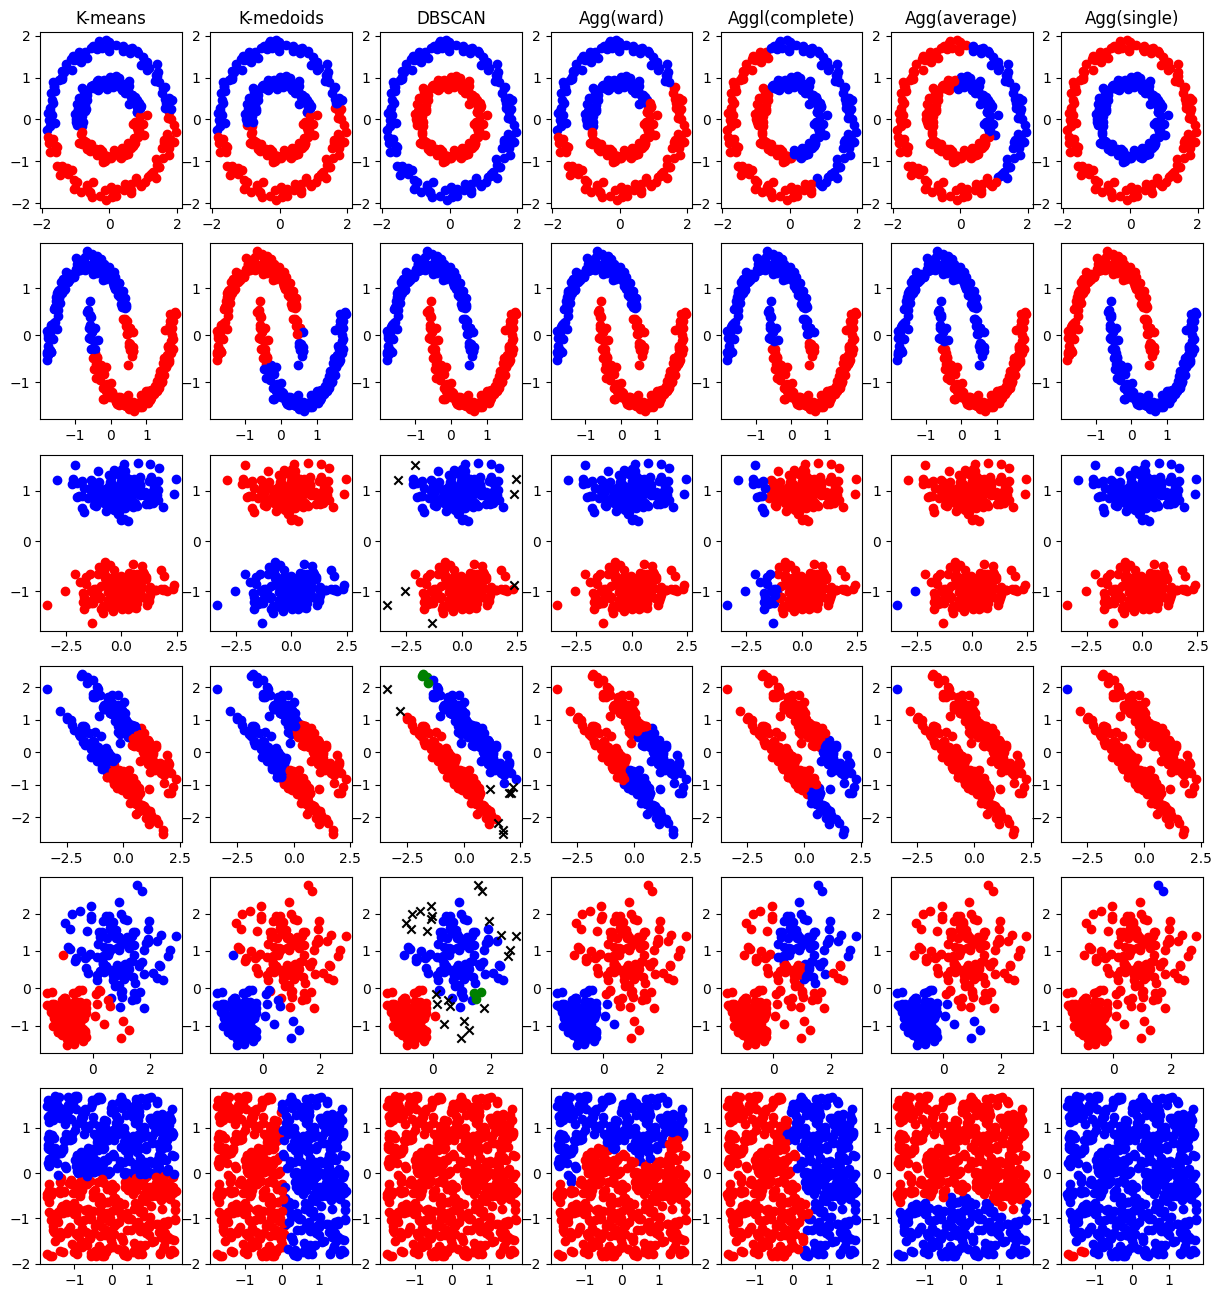

In [47]:
test_clustering()